Reads the image, resizes it and normalizes it.



In [6]:
import os
import cv2

def check_image_sizes(folder_path):
    print(f"Checking sizes in: {folder_path}")
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            img_path = os.path.join(folder_path, file_name)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Could not read image: {img_path}")
                continue
            h, w = image.shape[:2]
            print(f"{file_name}: {w}x{h}")

# Check image sizes
check_image_sizes("Kvasir-SEG/images")
check_image_sizes("Kvasir-SEG/masks")


Checking sizes in: Kvasir-SEG/images
colonoscopy_0001.jpg: 256x256
colonoscopy_0002.jpg: 256x256
colonoscopy_0003.jpg: 256x256
colonoscopy_0004.jpg: 256x256
colonoscopy_0005.jpg: 256x256
colonoscopy_0006.jpg: 256x256
colonoscopy_0007.jpg: 256x256
colonoscopy_0008.jpg: 256x256
colonoscopy_0009.jpg: 256x256
colonoscopy_0010.jpg: 256x256
colonoscopy_0011.jpg: 256x256
colonoscopy_0012.jpg: 256x256
colonoscopy_0013.jpg: 256x256
colonoscopy_0014.jpg: 256x256
colonoscopy_0015.jpg: 256x256
colonoscopy_0016.jpg: 256x256
colonoscopy_0017.jpg: 256x256
colonoscopy_0018.jpg: 256x256
colonoscopy_0019.jpg: 256x256
colonoscopy_0020.jpg: 256x256
colonoscopy_0021.jpg: 256x256
colonoscopy_0022.jpg: 256x256
colonoscopy_0023.jpg: 256x256
colonoscopy_0024.jpg: 256x256
colonoscopy_0025.jpg: 256x256
colonoscopy_0026.jpg: 256x256
colonoscopy_0027.jpg: 256x256
colonoscopy_0028.jpg: 256x256
colonoscopy_0029.jpg: 256x256
colonoscopy_0030.jpg: 256x256
colonoscopy_0031.jpg: 256x256
colonoscopy_0032.jpg: 256x256
col

In [2]:
import os
import cv2
import numpy as np

# Resize and normalize RGB image or mask
def preprocess_rgb_image(image_path):
    image = cv2.imread(image_path)  # Read in BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image_resized = cv2.resize(image, (256, 256))   # Resize
    image_normalized = image_resized / 255.0        # Normalize
    return image_normalized

# Process all images in a folder and overwrite the originals
def process_images_in_place(folder_path):
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            img_path = os.path.join(folder_path, file_name)
            processed = preprocess_rgb_image(img_path)

            # Convert back to uint8 and save
            processed_uint8 = (processed * 255).astype(np.uint8)
            cv2.imwrite(img_path, cv2.cvtColor(processed_uint8, cv2.COLOR_RGB2BGR))

# Run for both images and masks
process_images_in_place("Kvasir-SEG/images")
process_images_in_place("Kvasir-SEG/masks")


CLAHE on RGB Images


Method	                             Effectiveness	      Suitability for Polyps	RGB-safe	               Notes

CLAHE	                                ✅✅✅	               ✅✅✅             	✅    	  Local contrast, best for med imgs

Histogram Equalization	                   ✅	                 ❌	              ❌	         Too aggressive, global changes

Homomorphic Filtering	                   ✅	                 ⚠️ Needs tuning   ❌	           Can cause artifacts

Gamma Correction	                       ⚠️	                  ⚠️	            ✅	             Needs tuning per image

In [1]:
import os
import cv2
import numpy as np

def apply_clahe_rgb(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Split channels
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE on L-channel only
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    
    # Merge channels and convert back to BGR
    limg = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    return enhanced_img

def process_clahe_on_folder(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for file_name in os.listdir(input_folder):
        if file_name.endswith(('.jpg', '.png')):
            image_path = os.path.join(input_folder, file_name)
            image = cv2.imread(image_path)
            enhanced_image = apply_clahe_rgb(image)
            
            output_path = os.path.join(output_folder, file_name)
            cv2.imwrite(output_path, enhanced_image)

# Set your folders
input_folder = "Kvasir-SEG\images"
output_folder = "pro_1_images"

# Run processing
process_clahe_on_folder(input_folder, output_folder)


<>:35: SyntaxWarning: invalid escape sequence '\i'
<>:35: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Fathima\AppData\Local\Temp\ipykernel_15732\3963457884.py:35: SyntaxWarning: invalid escape sequence '\i'
  input_folder = "Kvasir-SEG\images"


In [3]:
# File processing
import os
from glob import glob
import json
from PIL import Image
from tqdm import tqdm

# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

# Data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Image processing
import cv2

60% Training, 20% Validation, 20% Testing


In [4]:
# Set the path to the dataset
full_path = "./Kvasir-SEG"

# Get the paths to the images and masks in the dataset
images = glob(os.path.join(full_path, "images/", "*"))
masks = glob(os.path.join(full_path, "masks/", "*"))

# Sort the image and mask paths
images.sort()
masks.sort()

# Define the path for the new organized dataset
new_full_path = "new_data/"
if not os.path.exists(new_full_path):
    os.mkdir(new_full_path)

# Define the paths for the training, validation, and testing sets
train_path = os.path.join(new_full_path, "train")
valid_path = os.path.join(new_full_path, "valid")
test_path = os.path.join(new_full_path, "test")

# Create the directories for the training, validation, and testing sets
if not os.path.exists(train_path):
    for path in [train_path, valid_path, test_path]:
        os.mkdir(path)
        os.mkdir(os.path.join(path, "images"))
        os.mkdir(os.path.join(path, "masks"))

# Calculate the sizes of the training, validation, and testing sets
len_ids = len(images)
train_size = int((60/100) * len_ids)
valid_size = int((20/100) * len_ids)  # 10% of the images used for validation
test_size = int((20/100) * len_ids)  # 10% of the images used for testing

# Split the images and masks into training and testing sets
train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
train_masks, test_masks = train_test_split(masks, test_size=test_size, random_state=42)

# Further split the training set into training and validation sets
train_images, valid_images = train_test_split(train_images, test_size=test_size, random_state=42)
train_masks, valid_masks = train_test_split(train_masks, test_size=test_size, random_state=42)

# Print the sizes of the dataset subsets
print("Total Size: ", len_ids)
print("Training Size: ", train_size)
print("Validation Size: ", valid_size)
print("Testing Size: ", test_size)

Total Size:  1000
Training Size:  600
Validation Size:  200
Testing Size:  200


### Generation of test set

In [5]:
# Iterate over the test images and masks
for idx, p in tqdm(enumerate(test_images), total=len(test_images)):
    # Extract the name of the image from the path
    name = p.split('\\')[-1].split('.')[0].split('_')[-1]

    # Get the paths for the image and mask
    image_path = test_images[idx]
    mask_path = test_masks[idx]

    # Check if the image and mask paths exist
    if os.path.exists(image_path) and os.path.exists(mask_path):
        # Read and save the test image
        image = cv2.imread(image_path)
        image_path = os.path.join(test_path, "images/", f"{str(name)}.jpg")
        cv2.imwrite(image_path, image)

        # Read, convert to grayscale, and save the test mask
        mask = cv2.imread(mask_path)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask_path = os.path.join(test_path, "masks/", f"{str(name)}.jpg")
        cv2.imwrite(mask_path, mask)

100%|██████████| 200/200 [00:05<00:00, 35.44it/s]


Test Image Size:  200
Test Mask Size:  200


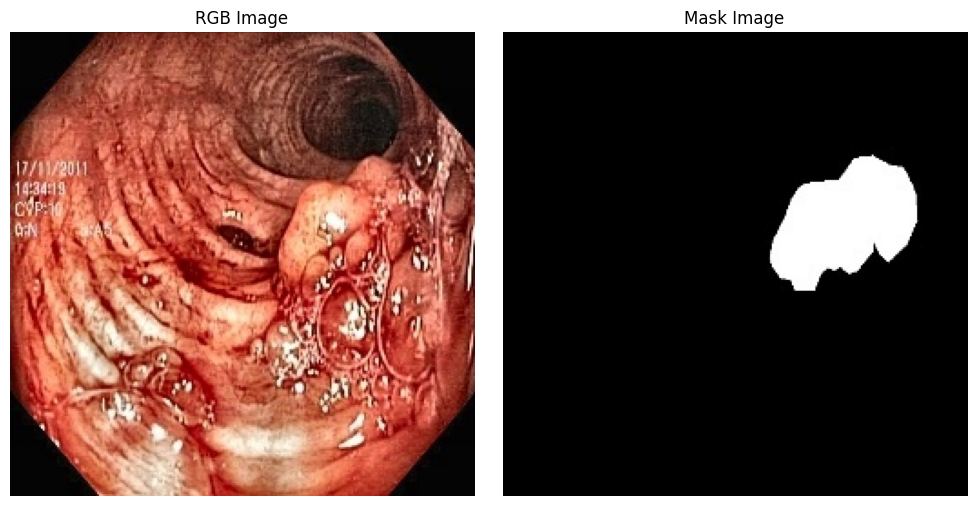

In [7]:
# Set the path to the images and masks in test directory
test_images_path = os.path.join(test_path, "images")
test_images = os.listdir(test_images_path)
test_masks_path = os.path.join(test_path, "masks")
test_masks = os.listdir(test_masks_path)

# Verify test mask and image sizes
print("Test Image Size: ", len(test_images))
print("Test Mask Size: ", len(test_masks))

# Read the a test image
BGR_img1 = cv2.imread(os.path.join(test_images_path, test_images[2]))

# Convert BGR image to RGB
RGB_img1 = cv2.cvtColor(BGR_img1, cv2.COLOR_BGR2RGB)

# Read the a test mask
mask_img1 = cv2.imread(os.path.join(test_masks_path, test_masks[2]))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the RGB image
axs[0].imshow(RGB_img1)
axs[0].set_title('RGB Image')

# Plot the mask image
axs[1].imshow(mask_img1)
axs[1].set_title('Mask Image')

for ax in axs:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


#### Generation of validation set

In [8]:
# Iterate over the validation images and masks
for idx, p in tqdm(enumerate(valid_images), total=len(valid_images)):
    # Extract the name of the image from the path
    name = p.split('\\')[-1].split('.')[0].split('_')[-1]

    # Get the paths for the image and mask
    image_path = valid_images[idx]
    mask_path = valid_masks[idx]

    # Check if the image and mask paths exist
    if os.path.exists(image_path) and os.path.exists(mask_path):
        # Read and save the validation image
        image = cv2.imread(image_path)
        image_path = os.path.join(valid_path, "images/", f"{str(name)}.jpg")
        cv2.imwrite(image_path, image)

        # Read, convert to grayscale, and save the validation mask
        mask = cv2.imread(mask_path)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask_path = os.path.join(valid_path, "masks/", f"{str(name)}.jpg")
        cv2.imwrite(mask_path, mask)

100%|██████████| 200/200 [00:00<00:00, 295.17it/s]


Validation Image Size:  200
Validation Mask Size:  200


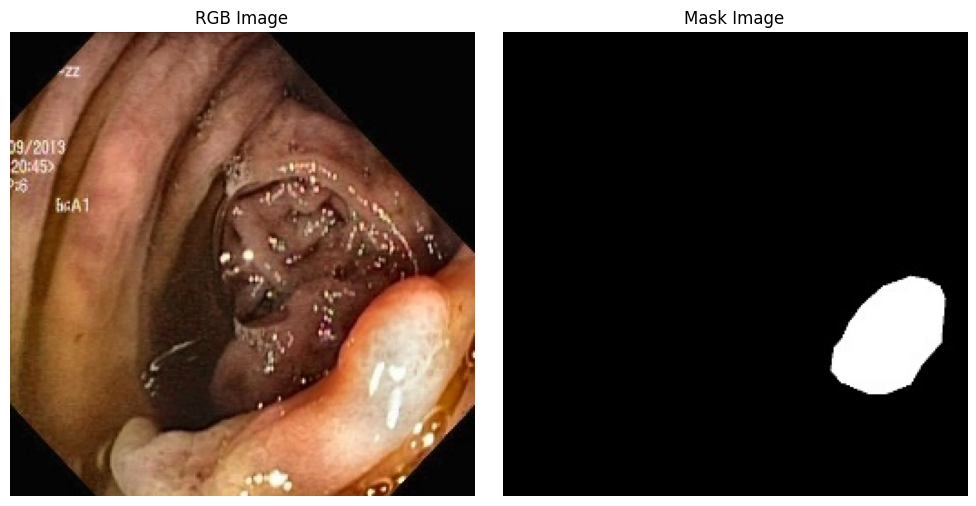

In [9]:
# Set the path to the images and masks in validation directory
valid_images_path = os.path.join(valid_path, "images")
valid_images = os.listdir(valid_images_path)
valid_masks_path = os.path.join(valid_path, "masks")
valid_masks = os.listdir(valid_masks_path)

# Verify validation mask and image sizes
print("Validation Image Size: ", len(valid_images))
print("Validation Mask Size: ", len(valid_masks))

# Read the a validation image
BGR_img1 = cv2.imread(os.path.join(valid_images_path, valid_images[2]))

# Convert BGR image to RGB
RGB_img1 = cv2.cvtColor(BGR_img1, cv2.COLOR_BGR2RGB)

# Read the a validation mask
mask_img1 = cv2.imread(os.path.join(valid_masks_path, valid_masks[2]))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the RGB image
axs[0].imshow(RGB_img1)
axs[0].set_title('RGB Image')

# Plot the mask image
axs[1].imshow(mask_img1)
axs[1].set_title('Mask Image')

# Remove the ticks and labels from both subplots
for ax in axs:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### Generation of train set

In [10]:
# Iterate over the train images and masks
for idx, p in tqdm(enumerate(train_images), total=len(train_images)):
    # Extract the name of the image from the path
    name = p.split('\\')[-1].split('.')[0].split('_')[-1]

    # Get the paths for the image and mask
    image_path = train_images[idx]
    mask_path = train_masks[idx]

    # Check if the image and mask paths exist
    if os.path.exists(image_path) and os.path.exists(mask_path):
        # Read and save the train image
        image = cv2.imread(image_path)
        image_path = os.path.join(train_path, "images/", f"{str(name)}.jpg")
        cv2.imwrite(image_path, image)

        # Read, convert to grayscale, and save the train mask
        mask = cv2.imread(mask_path)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask_path = os.path.join(train_path, "masks/", f"{str(name)}.jpg")
        cv2.imwrite(mask_path, mask)

100%|██████████| 600/600 [00:01<00:00, 303.77it/s]


Train Image Size:  600
Train Mask Size:  600


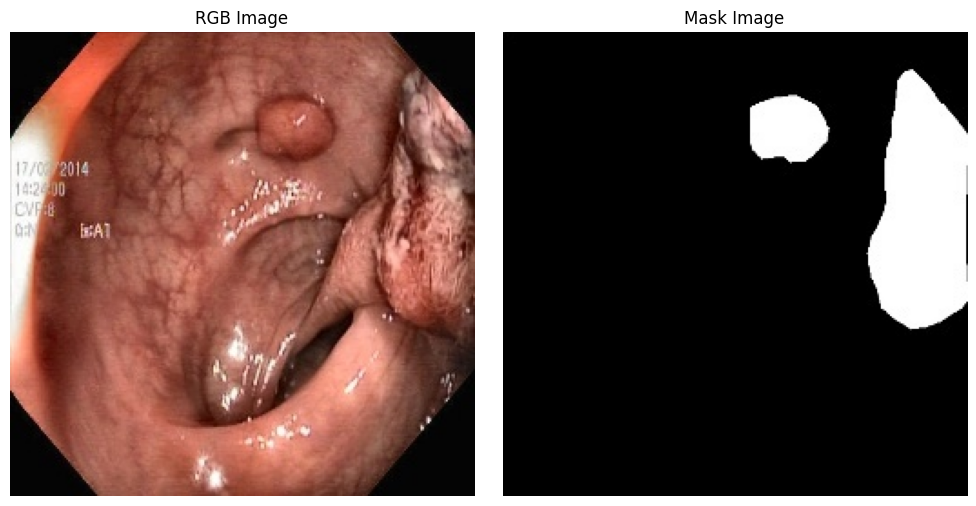

In [11]:
# Set the path to the images and masks in the train directory
train_images_path = os.path.join(train_path, "images")
train_images = os.listdir(train_images_path)
train_masks_path = os.path.join(train_path, "masks")
train_masks = os.listdir(train_masks_path)

# Verify train mask and image sizes
print("Train Image Size: ", len(train_images))
print("Train Mask Size: ", len(train_masks))

# Read a train image
BGR_img1 = cv2.imread(os.path.join(train_images_path, train_images[2]))

# Convert BGR image to RGB
RGB_img1 = cv2.cvtColor(BGR_img1, cv2.COLOR_BGR2RGB)

# Read a train mask
mask_img1 = cv2.imread(os.path.join(train_masks_path, train_masks[2]))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the RGB image
axs[0].imshow(RGB_img1)
axs[0].set_title('RGB Image')

# Plot the mask image
axs[1].imshow(mask_img1)
axs[1].set_title('Mask Image')

# Remove the ticks and labels from both subplots
for ax in axs:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()